# Some tricks to speed up your code with numpy
Some of these examples were adapted from the [Losing your Loops Fast Numerical Computing with Numpy](https://www.youtube.com/watch?v=EEUXKG97YRw) by Jake VanderPlas

In [1]:
from __future__ import division, print_function

import numpy as np
import matplotlib.pyplot as plt
from random import random

# ufuncs

Adding a number to all elements of a list

In [2]:
number = 12
a = [5, 2, 3, 4, 7, 4]
b = []

for val in a:
    b.append(val + number)

print(b)

[17, 14, 15, 16, 19, 16]


A more pythonic way

In [3]:
b = [val + number for val in a]
print(b)

[17, 14, 15, 16, 19, 16]


Okay, but what about when we need to do this for a large list?

In [4]:
num_points = 100000
a = [random() for i in range(num_points)] 

In [5]:
%timeit [val + number for val in a]

5.08 ms ± 121 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Now using numpy arrays

In [6]:
a = np.array(a)
a.dtype, a.shape

(dtype('float64'), (100000,))

In [7]:
%timeit a + number

32.4 µs ± 1.28 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


this is the same thing as

In [8]:
%timeit np.add(a, number)

31.4 µs ± 1.17 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


Other ufuncs are listed here https://docs.scipy.org/doc/numpy-1.15.1/reference/ufuncs.html

For example, the trig functions

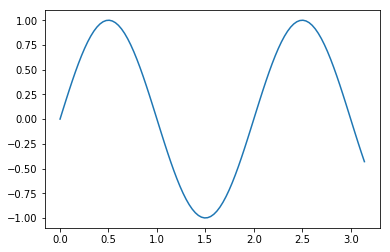

In [9]:
x = np.linspace(0, np.pi, 100)
plt.plot(x, np.sin(x*np.pi));

# aggregations

In [10]:
a = [random() for i in range(num_points)]
%timeit min(a)

1.21 ms ± 18.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [11]:
a = np.array(a)
%timeit a.min()

27 µs ± 1.06 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


### Other aggregation functions

np.sum, np.mean, np.std, np.var, np.percentile, np.median (also, np.nansum, np.nanmean, etc...)

### Now, in multiple dimensions

In [12]:
M = np.random.randint(0, 10, (3, 5))
M

array([[6, 4, 6, 4, 6],
       [2, 2, 6, 0, 4],
       [1, 4, 7, 5, 0]])

In [13]:
M.shape

(3, 5)

In [14]:
print(M[:, 0], M[0, :])

[6 2 1] [6 4 6 4 6]


In [15]:
np.sum(M, axis=0)

array([ 9, 10, 19,  9, 10])

In [16]:
M.sum(axis=0)

array([ 9, 10, 19,  9, 10])

In [17]:
M.sum(axis=1)

array([26, 14, 17])

# astropy tables

In [18]:
from astropy.table import Table

In [19]:
%%bash
head nsa-sample.txt
echo 
head greco-2018-lsgbs.csv

ra dec z
247.21776900602217 25.597781603742483 0.04083067923784256
213.324895894423 43.0186249699216 0.013429311104118824
318.3042481077502 -0.366553265763487 0.02043907158076763
259.53432413729126 56.73071221840958 0.02770909108221531
240.50800769084185 15.677708103452426 0.032056428492069244
155.83390685656238 41.39452222921626 0.05146477743983269
179.88111026116113 -1.002677719409676 0.04739953204989433
230.16767233111423 7.972027982265441 0.04862667992711067
12.75611992049017 -0.3805938457291839 0.054849039763212204

ra,dec
247.28273,43.67173
245.71466,43.726209999999995
241.37653999999998,44.3357
240.9165,43.98957
240.88005,44.10985
244.48317999999998,44.2905
241.51961,44.69582
242.29612999999998,44.35883
239.49327999999997,43.96829


In [20]:
nsa = Table.read('nsa-sample.txt', format='ascii')
lsb = Table.read('greco-2018-lsgbs.csv')

In [21]:
nsa[:10]

ra,dec,z
float64,float64,float64
247.21776900602217,25.597781603742483,0.04083067923784256
213.324895894423,43.0186249699216,0.013429311104118824
318.3042481077502,-0.366553265763487,0.02043907158076763
259.53432413729126,56.73071221840958,0.02770909108221531
240.50800769084185,15.677708103452426,0.032056428492069244
155.83390685656238,41.39452222921626,0.05146477743983269
179.88111026116113,-1.002677719409676,0.04739953204989433
230.16767233111423,7.972027982265441,0.04862667992711067
12.75611992049017,-0.3805938457291839,0.054849039763212204


In [22]:
nsa['z']

0.04083067923784256
0.013429311104118824
0.02043907158076763
0.02770909108221531
0.032056428492069244
0.05146477743983269
0.04739953204989433
0.04862667992711067
0.054849039763212204
0.03998105227947235
0.04267929866909981


# astropy SkyCoord is super useful!

In [23]:
from astropy.coordinates import SkyCoord

In [24]:
nsa_coord = SkyCoord(nsa['ra'], nsa['dec'], unit='deg')
lsb_coord = SkyCoord(lsb['ra'], lsb['dec'], unit='deg')

crossmatch catalogs

In [25]:
idx, sep, _ = lsb_coord.match_to_catalog_sky(nsa_coord)

find all sources separated by 2 degrees (a crazy large angle just for this example)

In [26]:
match_mask = sep.degree < 2.0

this creates a boolean mask

In [27]:
match_mask[:10]

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

the number of "matched" sources is given by the sum

In [28]:
match_mask.sum()

568

can get the matched nsa galaxies using **fancy indexing** with the index array `idx`

In [29]:
nsa[idx]

ra,dec,z
float64,float64,float64
245.0385994810276,42.06656513467549,0.03480241820216179
245.0385994810276,42.06656513467549,0.03480241820216179
240.48256980335452,44.97176062669269,0.03879241645336151
240.48256980335452,44.97176062669269,0.03879241645336151
240.48256980335452,44.97176062669269,0.03879241645336151
244.05033167943924,42.399811571802864,0.023163335397839546
240.48256980335452,44.97176062669269,0.03879241645336151
240.48256980335452,44.97176062669269,0.03879241645336151
240.48256980335452,44.97176062669269,0.03879241645336151


can combine the boolean mask with the index array to get the matched sources within 2 degrees

In [30]:
nsa[idx[match_mask]]

ra,dec,z
float64,float64,float64
245.0385994810276,42.06656513467549,0.03480241820216179
240.48256980335452,44.97176062669269,0.03879241645336151
240.48256980335452,44.97176062669269,0.03879241645336151
240.48256980335452,44.97176062669269,0.03879241645336151
244.05033167943924,42.399811571802864,0.023163335397839546
240.48256980335452,44.97176062669269,0.03879241645336151
240.48256980335452,44.97176062669269,0.03879241645336151
240.48256980335452,44.97176062669269,0.03879241645336151
240.48256980335452,44.97176062669269,0.03879241645336151
